In [1]:
import numpy as np
import matplotlib.pyplot as plt

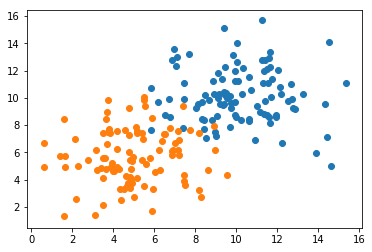

In [2]:
n_pts = 100
x_top = np.random.normal(10,2,n_pts)
y_top = np.random.normal(10,2,n_pts)

x_bot = np.random.normal(5,2,n_pts)
y_bot = np.random.normal(5,2,n_pts)


plt.scatter(x_top,y_top)
plt.scatter(x_bot,y_bot)
plt.show()

In [7]:
top_array = np.array([x_top,y_top]).T
bot_array = np.array([x_bot,y_bot]).T
print(bot_array[:5,:])

[[3.73323638 9.84676627]
 [1.62247226 4.92010922]
 [7.15259085 7.54149216]
 [4.90278299 5.38650847]
 [5.16493758 7.4449599 ]]


In [8]:
data = np.vstack((top_array,bot_array))

In [11]:
labels = np.matrix(np.append(np.ones(n_pts),np.zeros(n_pts))).T
#print(labels)

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(data,labels)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

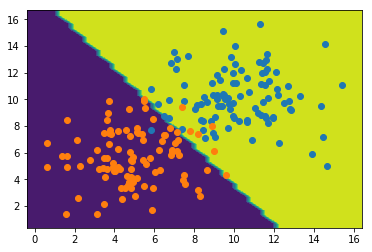

In [16]:
x_max , x_min = data[:,0].max()+1, data[:,0].min()-1
y_max , y_min = data[:,1].max()+1, data[:,1].min()-1

xx,yy = np.meshgrid(np.linspace(x_min,x_max),
                   np.linspace(y_min,y_max))
grid = np.c_[xx.ravel(),yy.ravel()]

pred = model.predict(grid).reshape(xx.shape)


plt.contourf(xx,yy,pred)
plt.scatter(x_top,y_top)
plt.scatter(x_bot,y_bot)
plt.show()


In [17]:
y_pred = model.predict(data)
from sklearn.metrics import confusion_matrix


In [18]:
cm = confusion_matrix(labels,y_pred)
print(cm)

[[94  6]
 [ 2 98]]


In [19]:
model.score(data,labels)

0.96